<h1>TAREA 5</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<p>Implemente, como una función de OpenCV, los filtros Chebyshev Tipo I: pasa-bajo, pasa-alto y pasa-banda.</p>
<p>Con imágenes sintéticas y reales, evaluar las técnicas de realce de imágenes, tanto en el dominio espacial como en el dominio frecuencial.</p>
<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [1]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from scipy.fftpack import dst,idst
#from scipy.fftpack import fft, fftfreq
import pywt


#Fourier para operaciones en el dominio de la frecuencia
def fft(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift

def ifft(img):
    fshift = np.fft.ifftshift(img)
    f = np.fft.ifft2(fshift)
    return f.real

img = cv2.imread('Fig/face.png',0)
print "Listo"


Listo


(<matplotlib.axes._subplots.AxesSubplot at 0x11b720050>,
 <matplotlib.text.Text at 0x11be84690>)

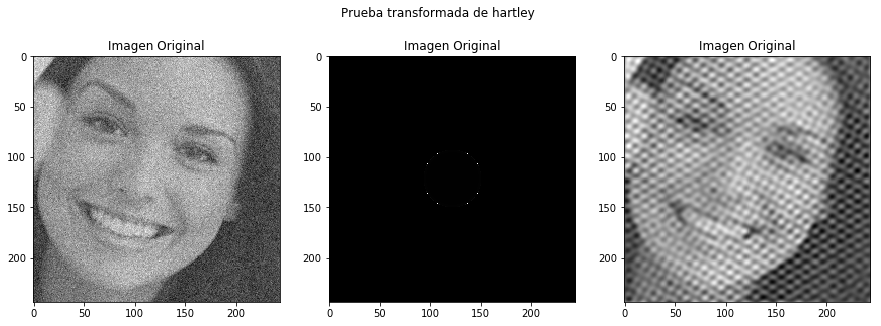

In [29]:
from scipy import signal

def chevy(N,x):
    if N == 0:
        return 1
    if N == 1:
        return x
    else:
        return 2* x * chevy(N-1,x) - chevy(N-2,x)
    

def chevy_filterlp(shape,f,pxd=1):
    pxd = float(pxd)
    h,w = shape
    x= np.linspace(-0.5,0.5,w)*w/pxd
    y= np.linspace(-0.5,0.5,h)*h/pxd
    radio=np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    
    rel = radio/f
    val = 1 / (1 - (0.01)**2*(chevy(10,radio/f)**2))

    val[val<0] = 0
    #val[val>1] = 1
    return val

gaussian_noise = np.zeros(img.shape)
cv2.randn(gaussian_noise,128,30);
tt = fft(img+gaussian_noise) 
filter_ch = chevy_filterlp(img.shape,25)
filtered = ifft(tt*filter_ch)

plt.figure(1,figsize=(15,5))
plt.suptitle('Prueba transformada de hartley')
plt.subplot(131), plt.imshow(img+gaussian_noise, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(filter_ch, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(133), plt.imshow(filtered, cmap=plt.cm.gray), plt.title('Imagen Original')

(<matplotlib.axes._subplots.AxesSubplot at 0x11d29f550>,
 <matplotlib.text.Text at 0x11d3c6910>)

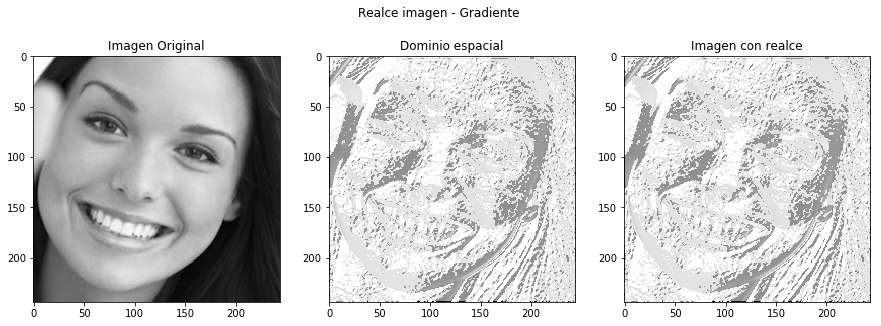

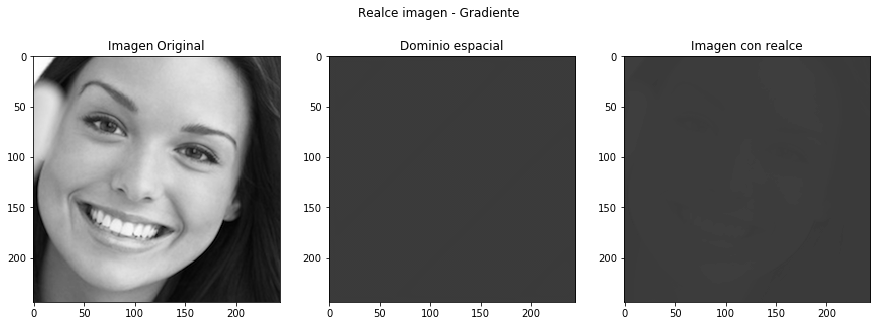

In [33]:
def enhanced_space(img):
    R,C = np.gradient(img)
    return img - (C+R)**2

def enhanced_frecuency(img):
    img_f = fft(img)
    
    w,h = img_f.shape
    
    enhanced = np.zeros((w,h))
    
    cx = w/2
    cy = h/2
    for u in range(w-1):
        for v in range(h-1):
            enhanced[u][v] = 1 + ((u-cx)**2 + (v-cy)**2)
    return enhanced

rel = enhanced_space(img)
rel_2 = ifft(enhanced_frecuency(img))


plt.figure(1,figsize=(15,5))
plt.suptitle('Realce imagen - Gradiente')
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(rel, cmap=plt.cm.gray), plt.title('Dominio espacial')
plt.subplot(133), plt.imshow(img+rel, cmap=plt.cm.gray), plt.title('Imagen con realce')

plt.figure(2,figsize=(15,5))
plt.suptitle('Realce imagen - Gradiente')
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(rel_2, cmap=plt.cm.gray), plt.title('Dominio espacial')
plt.subplot(133), plt.imshow(img+rel_2, cmap=plt.cm.gray), plt.title('Imagen con realce')

(<matplotlib.axes._subplots.AxesSubplot at 0x11f48ce90>,
 <matplotlib.text.Text at 0x12619bf10>)

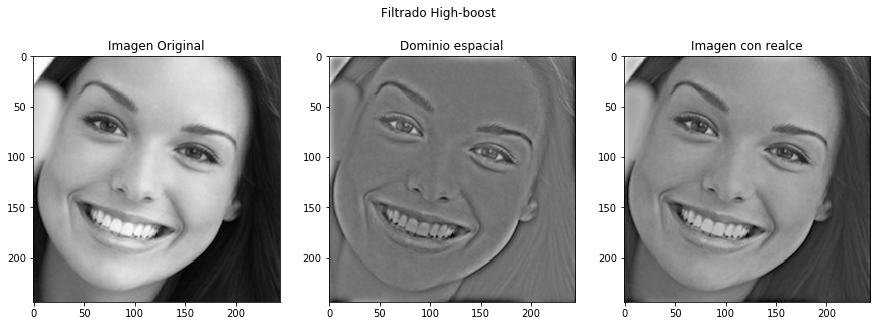

In [61]:
#Filtrado High-boost

def gauss2d_lp(shape,filt,pxd=1):
    pxd = float(pxd)
    h,w = shape
    x= np.linspace(-0.5,0.5,w)*w/pxd
    y= np.linspace(-0.5,0.5,h)*h/pxd
    radio=np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    
    pot=-0.5*(radio**2)/(filt**2)
    f=np.exp(pot)
    return f

def Hhb(img,A,f): 
    img_f = fft(img)
    img_filtered = (1 - gauss2d_lp(img_f.shape,f))*img_f
    return ifft((A-1) + img_filtered)

rel_hb = Hhb(img,1,10)

plt.figure(1,figsize=(15,5))
plt.suptitle('Filtrado High-boost')
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(rel_hb, cmap=plt.cm.gray), plt.title('Dominio espacial')
plt.subplot(133), plt.imshow(img+rel_hb, cmap=plt.cm.gray), plt.title('Imagen con realce')



(<matplotlib.axes._subplots.AxesSubplot at 0x1255f3a10>,
 <matplotlib.text.Text at 0x1266d9510>)

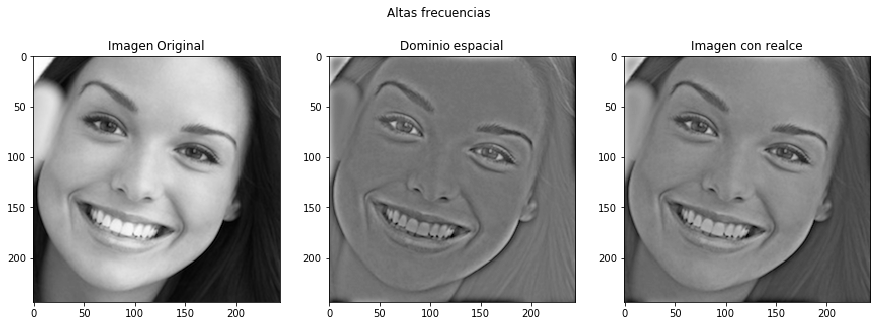

In [60]:
#Altas frecuencias

def Hhfe(img,a,b,f):
    if(a<0):
        print "Error a < 0"
        return 0
    if(b < a):
        print "Error b < a"
        return 0
    img_f = fft(img)
    Hhp = (1 - gauss2d_lp(img_f.shape,f))*img_f
    return ifft(a + b*Hhp)

rel_AF = Hhfe(img,0.5,2,10)

plt.figure(1,figsize=(15,5))
plt.suptitle('Altas frecuencias')
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(rel_AF, cmap=plt.cm.gray), plt.title('Dominio espacial')
plt.subplot(133), plt.imshow(img+rel_AF, cmap=plt.cm.gray), plt.title('Imagen con realce')